<a href="https://colab.research.google.com/github/flaviorv/ml_classification/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree - Depth: 17


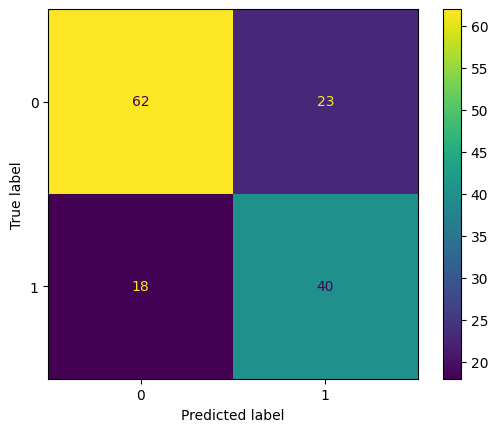

True Negatives: 62
False Positives: 23
False Negatives: 18
True positives: 40

  accuracy  precision  recall  f1-score
     0.71       0.63    0.69      0.66



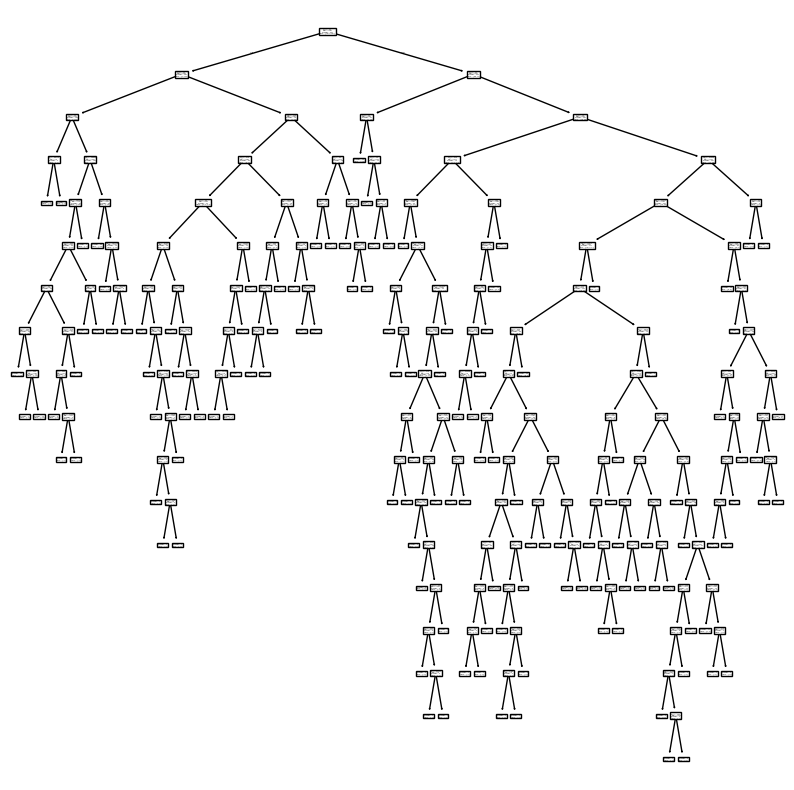

In [183]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def show_confusion_matrix(y_true, y_pred):
  """Question 2.1 - Confusion Matrix containing predicteds x true samples"""
  cm = confusion_matrix(y_true, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  display.plot()
  plt.show()

def show_counts(y_true, y_pred):
  """Question 2.2 - returning True Negatives, False Positives, False Negatives and True Positives"""
  cm = confusion_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()
  print('True Negatives:', tn)
  print('False Positives:', fp)
  print('False Negatives:', fn)
  print('True positives:', tp)

def show_metrics(y_true, y_pred, metrics=['accuracy']):
  """Questions 2.3 and 2.4 - Can show accuracy, precision, recall or/and f1-score metrics"""
  cr = classification_report(y_true, y_pred, output_dict=True)
  metrics_df = pd.DataFrame()
  for metric in metrics:
    if metric in cr['1']:
      metrics_df[metric] = [round(cr['1'][metric], 2)]
    elif metric == 'accuracy':
      metrics_df[metric] = [round(cr[metric], 2)]
  print('\n', metrics_df.to_string(index=False), end='\n\n')

def plot(tree):
  """Question 4 - Ploting the trees and its decision nodes"""
  plt.figure(figsize=(10, 10))
  plot_tree(tree)
  plt.show()

def dt_model(x_train, x_test, y_train, y_test, depths=[None]):
  """Question 2 and 3 - Can create Decision Trees with differents depths, return its metrics and plot charts of the decision nodes"""
  for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    print(f'Decision Tree - Depth: {dt.get_depth()}')
    y_pred = dt.predict(x_test)
    show_confusion_matrix(y_test, y_pred)
    show_counts(y_test, y_pred)
    show_metrics(y_test, y_pred, ['accuracy', 'precision', 'recall', 'f1-score'])
    plot(dt)

# 1 - loading dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/titanic_data.csv')

# 1.1 - removing features
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 1.2 - eliminating missing data
dataset.dropna(inplace=True)

# 1.3 - applying Label Enconder in  'Embarked'and 'Sex' variables
le = LabelEncoder()
dataset['Embarked_Encoded'] = le.fit_transform(dataset['Embarked'])
dataset['Sex_Encoded'] = le.fit_transform(dataset['Sex'])

# 1.4 - splitting data into training(80%) and testing(20%)
y = dataset.pop('Survived')
x = dataset[['Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Encoded']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# 2 - default Decision Tree model
dt_model(x_train, x_test, y_train, y_test)

Decision Tree - Depth: 3


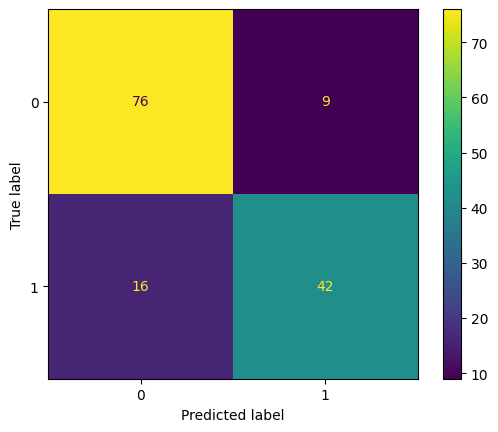

True Negatives: 76
False Positives: 9
False Negatives: 16
True positives: 42

  accuracy  precision  recall  f1-score
     0.83       0.82    0.72      0.77



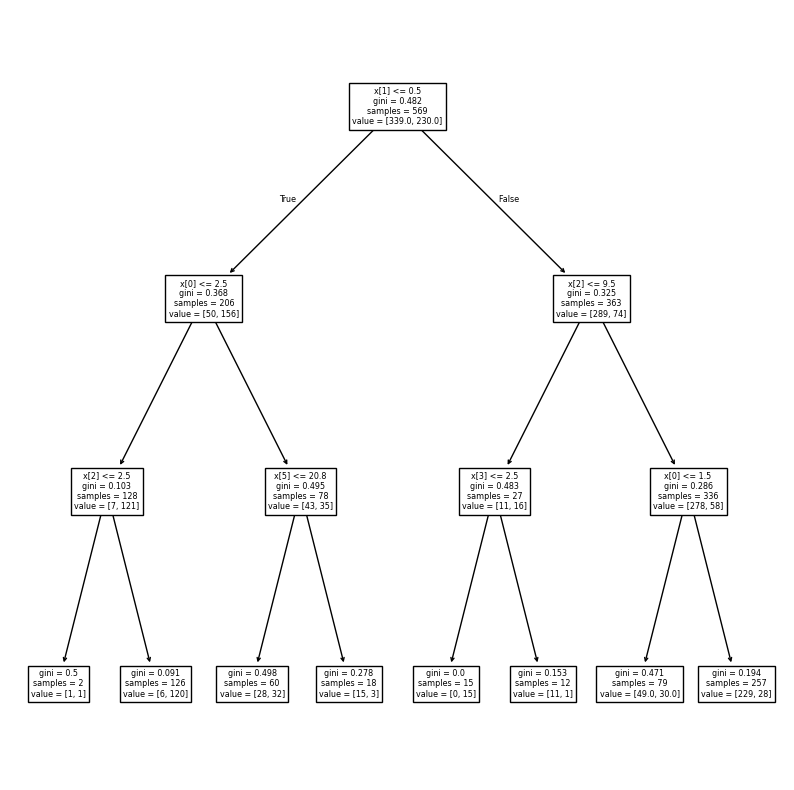

Decision Tree - Depth: 4


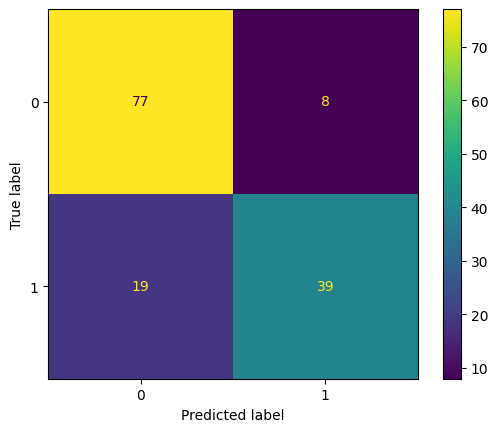

True Negatives: 77
False Positives: 8
False Negatives: 19
True positives: 39

  accuracy  precision  recall  f1-score
     0.81       0.83    0.67      0.74



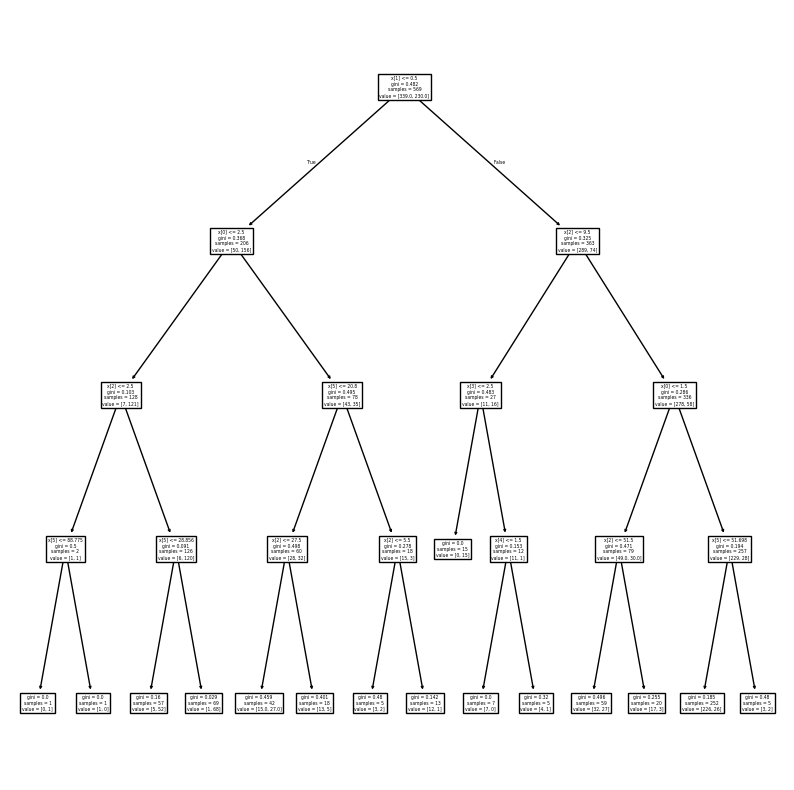

In [184]:
# 3 - Decision Trees with different depths
dt_model(x_train, x_test, y_train, y_test, [3, 4])